In [3]:
import requests

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
# 1min, 5min, 15min, 30min, 60min
# adjusted=true
key = "RK00RVTPL1ZWP1ZJ"
m = "2024-07"
d = "2024-01-01"
#url = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=GME&interval=5min&month='+m+'&outputsize=full&apikey=' + key
#url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=QQQ&apikey='+key
#url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&date='+d+'&symbol=SPY&apikey='+key
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=CEP&interval=1min&outputsize=full&apikey='+key

r = requests.get(url)
data = r.json()
#data2

In [5]:
#dd = pd.DataFrame(data["Time Series (1min)"]).T[::-1]
#dd.to_csv("data/cep2.csv")
import pandas as pd

df = pd.read_csv("data/cep0.csv").set_index("time")
df

,open,high,low,close,volume
time,,,,,
4/23/2025 4:01,11.0500,11.51,11.05,11.51,200
4/23/2025 4:04,11.4000,11.40,11.40,11.40,900
4/23/2025 4:06,11.3000,11.30,11.30,11.30,1000
4/23/2025 4:13,11.1000,11.10,11.10,11.10,1000
4/23/2025 4:26,11.1000,11.10,11.10,11.10,1000
...,...,...,...,...,...
4/24/2025 19:55,26.9800,26.98,26.80,26.90,2492
4/24/2025 19:56,26.9000,26.90,26.75,26.85,5338
4/24/2025 19:57,26.8573,26.86,26.65,26.65,8046


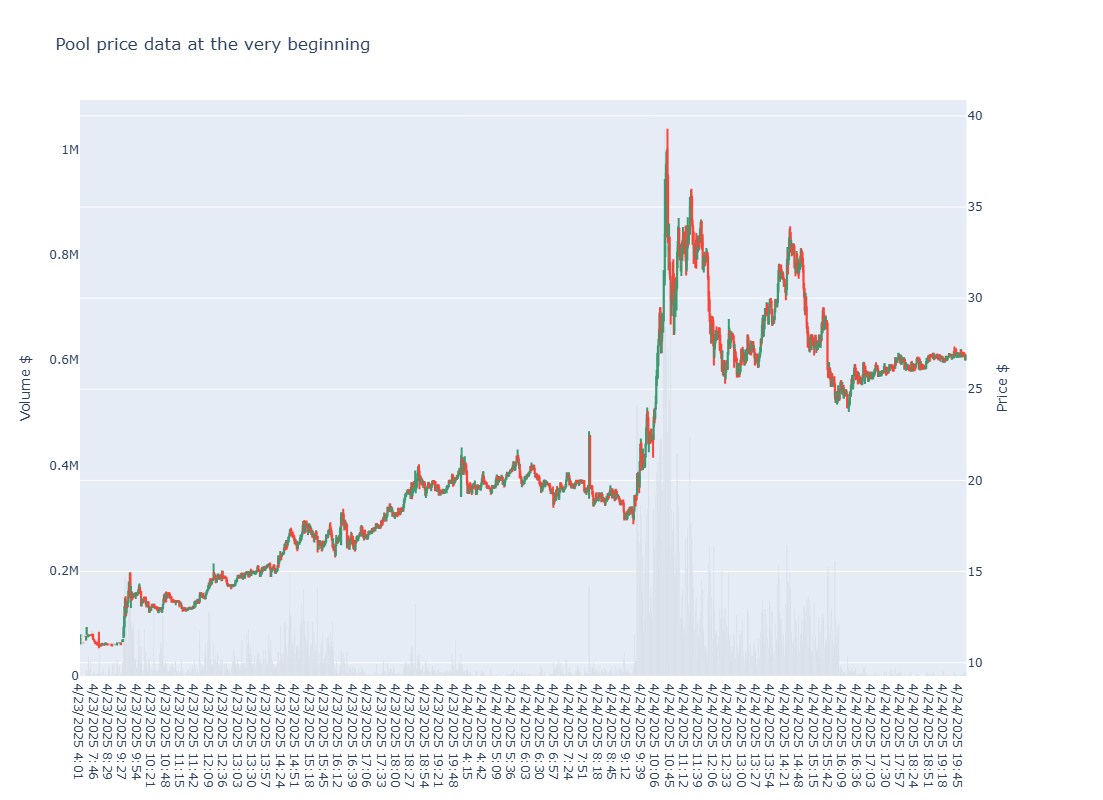

In [13]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

candlesticks = go.Candlestick(
    x=df.index,
    open=df['open'],
    high=df['high'],
    low=df['low'],
    close=df['close'],
    showlegend=False
)

volume_bars = go.Bar(
    x=df.index,
    y=df['volume'],
    showlegend=False,
    marker={
        "color": "rgba(128,128,128,0.5)",
    }
)

fig = go.Figure(candlesticks)
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(candlesticks, secondary_y=True)
fig.add_trace(volume_bars, secondary_y=False)
fig.update_layout(
    title="Pool price data at the very beginning",
    height=800,
    # Hide Plotly scrolling minimap below the price chart
    xaxis={"rangeslider": {"visible": False}},
)
fig.update_yaxes(title="Volume $", secondary_y=False, showgrid=False)
fig.update_yaxes(title="Price $", secondary_y=True, showgrid=True)



fig.show()

In [164]:

df = pd.DataFrame()
df["close"] = pd.DataFrame(data["Time Series (1min)"]).T["4. close"][::-1].astype(float)[-618::]
df["idx"] = range(len(df))
df["dir"] = 19
df["inter"] = 0
df

,close,idx,dir,inter
2025-04-24 09:30:00,20.2499,0,19,0
2025-04-24 09:31:00,20.3100,1,19,0
2025-04-24 09:32:00,19.9700,2,19,0
2025-04-24 09:33:00,20.0100,3,19,0
2025-04-24 09:34:00,19.8300,4,19,0
...,...,...,...,...
2025-04-24 19:55:00,26.9000,613,19,0
2025-04-24 19:56:00,26.8500,614,19,0
2025-04-24 19:57:00,26.6500,615,19,0
2025-04-24 19:58:00,26.8000,616,19,0


In [177]:
#df.loc[date].close
df.to_csv("data/cep1.csv")
df2.to_csv("data/cep1_res.csv")
uvxy.to_csv("data/uvxy1.csv")
df4.to_csv("data/uvxy_res.csv")

In [190]:
c = (df.close - df.shift(1).close).dropna()

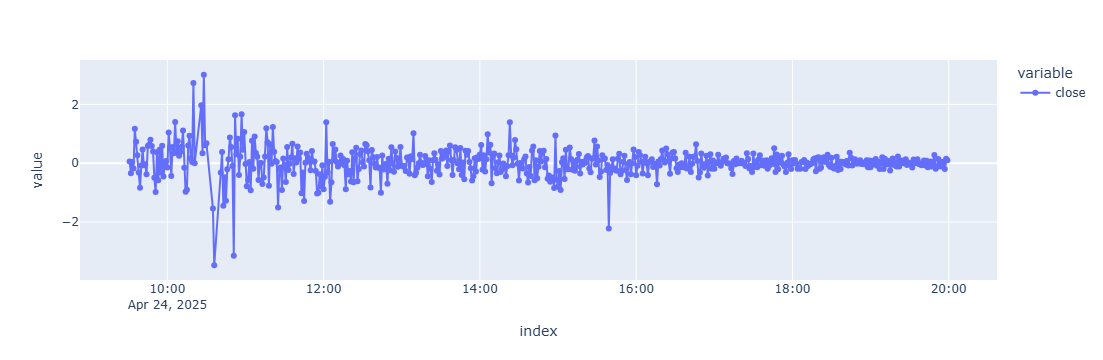

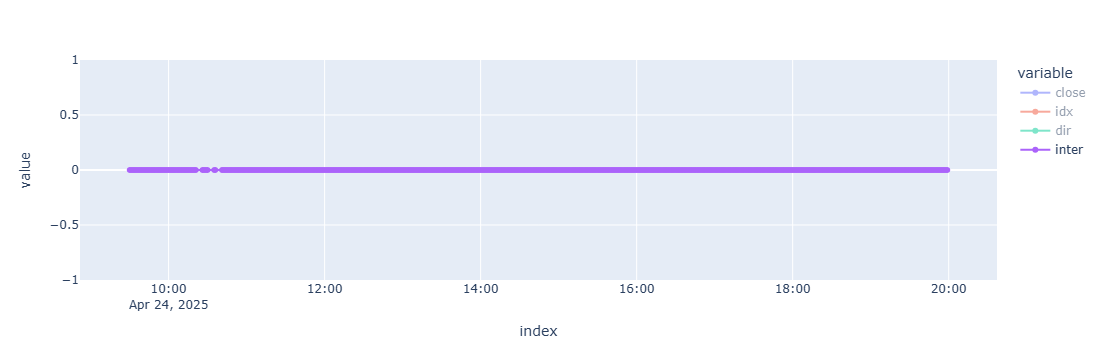

In [191]:
import plotly.express as px

fig = px.scatter(c)
fig.update_traces(mode="lines+markers")
fig.show()

fig = px.scatter(df)
fig.update_traces(mode="lines+markers")
fig.show()

In [171]:
upper = 2
lower = 1

data = [] #[["date","close","idx","dir","inter"],]

for date, row in df.iterrows():
    d = [date, row.close]
    #print(row.close)
    #print(date)
    #row.index
    for _, r2 in df[int(row.idx):].iterrows():
        if row.close+upper <= r2.close: # succeed
            #df.loc[date].dir = 40
            d.append(40)
            #df.loc[date].inter = r2.idx - row.idx
            d.append(r2.idx - row.idx)
            break
        elif row.close-lower >= r2.close: # fail
            #df.loc[date].dir = 19
            d.append(19)
            #df.loc[date].inter = r2.idx - row.idx
            d.append(r2.idx - row.idx)
            break
    if len(d) == 2:
        d.append(0)
        d.append(0)
    data.append(d)
data
# Result
# 1. if I apply it at the current price, is my trade successful or not. 
# df.to_dict()

[['2025-04-24 09:30:00', 20.2499, 40, 17.0],
 ['2025-04-24 09:31:00', 20.31, 40, 16.0],
 ['2025-04-24 09:32:00', 19.97, 40, 5.0],
 ['2025-04-24 09:33:00', 20.01, 40, 14.0],
 ['2025-04-24 09:34:00', 19.83, 40, 3.0],
 ['2025-04-24 09:35:00', 21.0, 40, 13.0],
 ['2025-04-24 09:36:00', 21.73, 40, 13.0],
 ['2025-04-24 09:37:00', 22.0, 19, 2.0],
 ['2025-04-24 09:38:00', 21.6799, 40, 11.0],
 ['2025-04-24 09:39:00', 20.84, 40, 9.0],
 ['2025-04-24 09:40:00', 20.76, 40, 8.0],
 ['2025-04-24 09:41:00', 21.225, 40, 7.0],
 ['2025-04-24 09:42:00', 21.1499, 40, 6.0],
 ['2025-04-24 09:43:00', 21.11, 40, 5.0],
 ['2025-04-24 09:44:00', 20.7338, 40, 3.0],
 ['2025-04-24 09:45:00', 21.32, 40, 3.0],
 ['2025-04-24 09:46:00', 21.95, 40, 19.0],
 ['2025-04-24 09:47:00', 22.75, 40, 19.0],
 ['2025-04-24 09:48:00', 23.33, 19, 3.0],
 ['2025-04-24 09:49:00', 23.73, 19, 2.0],
 ['2025-04-24 09:50:00', 23.2301, 19, 3.0],
 ['2025-04-24 09:51:00', 22.2516, 40, 15.0],
 ['2025-04-24 09:52:00', 22.6191, 40, 14.0],
 ['2025-04-

In [172]:
df2 = pd.DataFrame(data)
df2 = df2.set_axis(['time', 'close', 'dir', 'inter'], axis=1).set_index("time")
display((df2[df2.dir == 40]).count())
(df2[df2.dir == 19]).count()


close    184
dir      184
inter    184
dtype: int64

close    217
dir      217
inter    217
dtype: int64

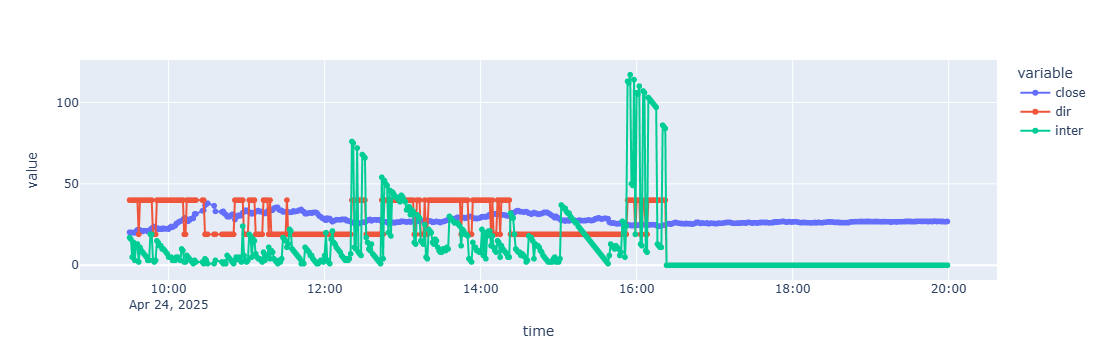

In [175]:
import plotly.express as px

fig = px.scatter(df2)
fig.update_traces(mode="lines+markers")
fig.show()

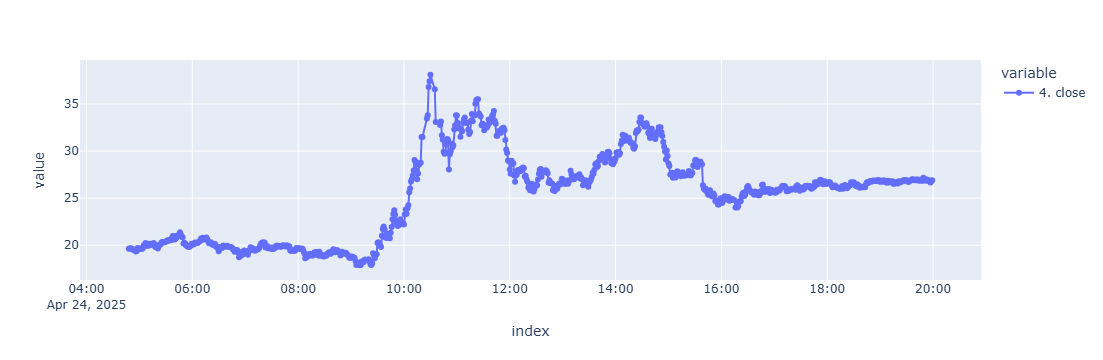

In [176]:
uvxy = pd.DataFrame(data2["Time Series (1min)"]).T["4. close"][::-1].astype(float)

import plotly.express as px

fig = px.scatter(uvxy[-900:])
fig.update_traces(mode="lines+markers")
fig.show()

#uvxy[-900:]

In [142]:
df3 = pd.DataFrame()
df3["close"] = uvxy[-900:]
df3["idx"] = range(len(df3))
df3["dir"] = 30
df3["inter"] = 0
df3

,close,idx,dir,inter
2025-04-24 04:12:00,33.91,0,19,0
2025-04-24 04:13:00,33.92,1,19,0
2025-04-24 04:14:00,33.90,2,19,0
2025-04-24 04:15:00,33.98,3,19,0
2025-04-24 04:16:00,33.90,4,19,0
...,...,...,...,...
2025-04-24 19:56:00,30.79,895,19,0
2025-04-24 19:57:00,30.80,896,19,0
2025-04-24 19:58:00,30.85,897,19,0
2025-04-24 19:59:00,30.80,898,19,0


In [156]:
upper = 1.5
lower = 3

data = [] #[["date","close","idx","dir","inter"],]

for date, row in df3.iterrows():
    d = [date, row.close]
    #print(row.close)
    #print(date)
    #row.index
    for _, r2 in df3[int(row.idx):].iterrows():
        if row.close+upper <= r2.close: # succeed
            #df.loc[date].dir = 40
            d.append(35)
            #df.loc[date].inter = r2.idx - row.idx
            d.append(r2.idx - row.idx)
            break
        elif row.close-lower >= r2.close: # fail
            #df.loc[date].dir = 19
            d.append(30)
            #df.loc[date].inter = r2.idx - row.idx
            d.append(r2.idx - row.idx)
            break
    if len(d) == 2:
        d.append(32.5)
        d.append(0)
    data.append(d)
data

[['2025-04-24 04:12:00', 33.91, 30, 755.0],
 ['2025-04-24 04:13:00', 33.92, 30, 754.0],
 ['2025-04-24 04:14:00', 33.9, 30, 753.0],
 ['2025-04-24 04:15:00', 33.98, 30, 679.0],
 ['2025-04-24 04:16:00', 33.9, 30, 751.0],
 ['2025-04-24 04:17:00', 33.9, 30, 750.0],
 ['2025-04-24 04:18:00', 33.88, 30, 749.0],
 ['2025-04-24 04:19:00', 33.88, 30, 748.0],
 ['2025-04-24 04:20:00', 33.88, 30, 747.0],
 ['2025-04-24 04:21:00', 33.78, 30, 765.0],
 ['2025-04-24 04:22:00', 33.78, 30, 764.0],
 ['2025-04-24 04:23:00', 33.76, 30, 773.0],
 ['2025-04-24 04:24:00', 33.79, 30, 762.0],
 ['2025-04-24 04:25:00', 33.85, 30, 749.0],
 ['2025-04-24 04:26:00', 33.87, 30, 744.0],
 ['2025-04-24 04:27:00', 33.92, 30, 740.0],
 ['2025-04-24 04:29:00', 33.95, 30, 668.0],
 ['2025-04-24 04:30:00', 33.95, 30, 667.0],
 ['2025-04-24 04:31:00', 33.94, 30, 737.0],
 ['2025-04-24 04:32:00', 33.96, 30, 663.0],
 ['2025-04-24 04:33:00', 33.95, 30, 664.0],
 ['2025-04-24 04:34:00', 33.96, 30, 661.0],
 ['2025-04-24 04:35:00', 33.95, 30,

In [157]:
df4 = pd.DataFrame(data)
df4 = df4.set_axis(['time', 'close', 'dir', 'inter'], axis=1).set_index("time")
display((df4[df4.dir == 35]).count())
(df4[df4.dir == 30]).count()

close    0
dir      0
inter    0
dtype: int64

close    104
dir      104
inter    104
dtype: int64

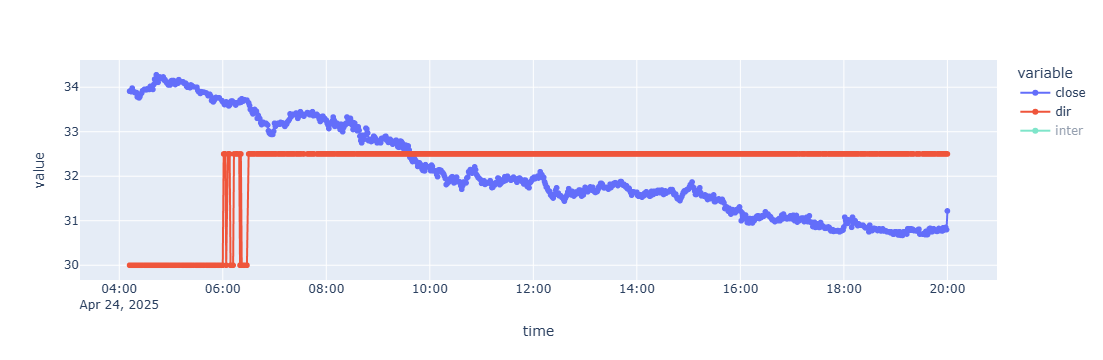

In [158]:
import plotly.express as px

fig = px.scatter(df4)
fig.update_traces(mode="lines+markers")
fig.show()